<a href="https://colab.research.google.com/github/among5094/Big-Data-Integrated-Analysis/blob/main/week12_CH10_%ED%81%B4%EB%9F%AC%EC%8A%A4%ED%84%B0%EB%A7%81%EC%9D%84_%ED%99%9C%EC%9A%A9%ED%95%9C_%EC%87%BC%ED%95%91%EB%AA%B0_%ED%9A%8C%EC%9B%90%EA%B4%80%EB%A6%AC/week12_CH10_%ED%81%B4%EB%9F%AC%EC%8A%A4%ED%84%B0%EB%A7%81%EC%9D%84_%ED%99%9C%EC%9A%A9%ED%95%9C_%EC%87%BC%ED%95%91%EB%AA%B0_%ED%9A%8C%EC%9B%90%EA%B4%80%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CH010 회귀분석 - 클러스터링을 활용한 쇼핑몰 회원 관리

날짜: 05월 26일 월요일

### 10.1 클러스터링

##### 10.1.(1) K-Means 알고리즘

sklearn.cluster.KMeans 모델 사용 방법

클러스터 번호: [1 1 1 0 0 0]
중심점: [[10.  2.]
 [ 1.  2.]]
응집도: 16.0
-16.0


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52629 (\N{HANGUL SYLLABLE CUG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44400 (\N{HANGUL SYLLABLE GUN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51665 (\N{HANGUL SYLLABLE JIB}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54868 (\N{HANGUL SYLLABLE HWA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44208 (\N{HANGUL SYLLABLE GYEOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/us

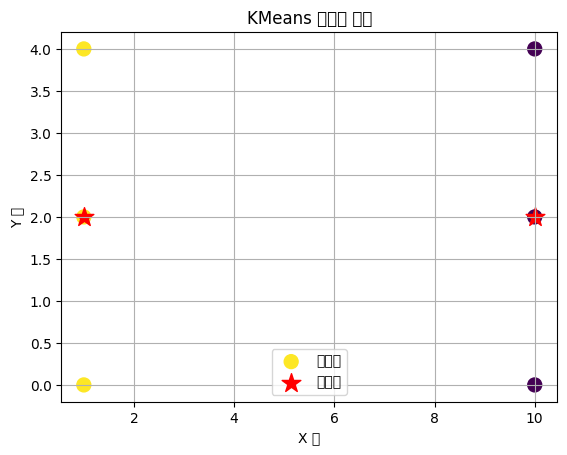

In [ ]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt


# 학습 데이터 정의 (6개의 2차원 좌표)
X = np.array([[1, 2], [1, 4], [1, 0],
              [10, 2], [10, 4], [10, 0]])

# KMeans 모델 생성 (2개의 클러스터로 나누기)
kmeans = KMeans(n_clusters=2)

# 모델 학습 - 비지도학습
kmeans.fit(X)

# 각 데이터가 속한 클러스터(0 또는 1)
# KMeans가 데이터의 특성을 보고 자체적으로 군집을 나눈 결과
print(f'클러스터 번호: {kmeans.labels_}')

# 각 클러스터의 중심 좌표
print(f'중심점: {kmeans.cluster_centers_}')

# 응집도(Inertia): 클러스터 내 거리 제곱합 (반환값 양수, 작을수록 좋음)
print(f'응집도: {kmeans.inertia_}')

# score(): 음의 응집도를 반환 (-inertia_), 절댓값이 작을수록 좋다.
print(kmeans.score(X))

# -------------------
# 시각화 파트
# -------------------

# 각 데이터 포인트의 클러스터에 따라 색깔을 다르게 그림
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='viridis', s=100, label='데이터')

# 클러스터 중심점 그리기 (별모양)
plt.scatter(kmeans.cluster_centers_[:, 0],
            kmeans.cluster_centers_[:, 1],
            s=200, c='red', marker='*', label='중심점')

# 시각화 옵션
plt.title('KMeans 군집화 결과')
plt.xlabel('X 축')
plt.ylabel('Y 축')
plt.legend()
plt.grid(True)
plt.show()

###### 최적의 K값 찾기!!
- ① KMeans 클래스의 속성 중 inertia(응집도)를 사용하는 elbow 방법
- ② yellowbrick에서 제공하는 KElbowVisualizer 를 사용하는 방법

📌 원리
- 클러스터 수 k를 1부터 여러 개로 바꿔가며 KMeans를 반복 실행함
- 각 k에 대해 응집도(inertia) 값을 측정함
- k값이 커질수록 응집도는 줄어드는데, 어느 순간부터 감소율이 급격히 줄어드는 지점이 나타남
- 그 지점이 **팔꿈치(Elbow)**처럼 보이기 때문에 **‘엘보우 포인트’**를 적절한 k값으로 선택!

- ① 응집도를 활요한 Elbow 를 사용하는 방법
- 결과: 클러스터 수 3이 지점부터 응집도의 값 변화가 거의 없기 때문에 3이 적절한 클러스터 수(k)이다.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51025 (\N{HANGUL SYLLABLE EUNG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51665 (\N{HANGUL SYLLABLE JIB}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


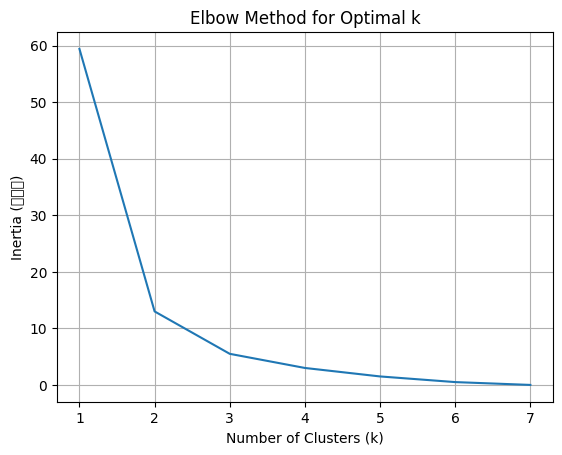

In [ ]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

# 데이터: 2차원 좌표 (총 6개 샘플)
fruit = np.array([[3, 4], [1, 5], [7, 9], [5, 4], [6, 8], [2, 3], [4, 4]])

temp = []  # 각 군집 수에 대한 응집도(inertia)를 저장할 리스트

# 군집 수를 1부터 7까지 바꾸어가며 모델 학습
for i in range(1, 8):
    kmeans = KMeans(n_clusters=i)  # i개의 클러스터로 모델 생성
    kmeans.fit(fruit)              # 학습
    temp.append(kmeans.inertia_)  # 응집도(inertia_) 저장

# 군집 수(k)에 따른 응집도 시각화
plt.plot(range(1, 8), temp)
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (응집도)")
plt.title("Elbow Method for Optimal k")
plt.grid(True)
plt.show()


- ② KElbowVisualizer 를 사용하는 방법
- 결과: k값에 따른 각 지점에서 중심점까지의 거리에 대한 제곱합(오차제곱의 합) 은 파란색으로, 훈련하는 데 걸리는 시간은 초록색으로 표시함
- 적절한 k값은 점선으로 표시

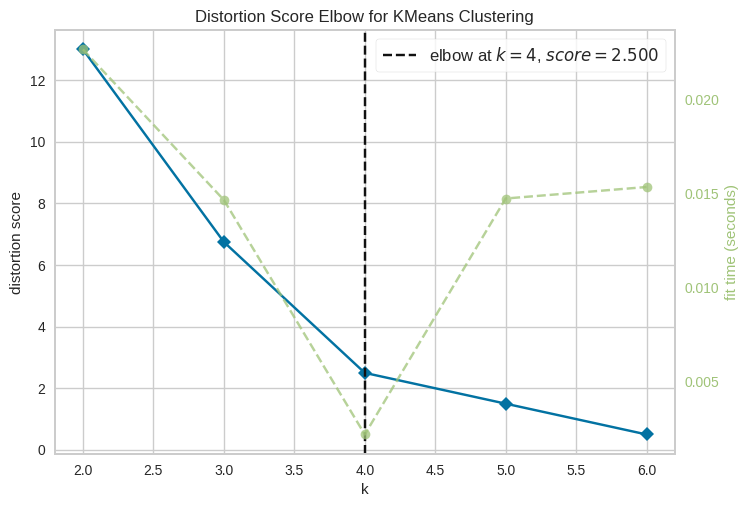

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
from sklearn.cluster import KMeans # KMeans 알고리즘 불러오기
import numpy as np # 넘파이: 수치 데이터 처리
import matplotlib.pyplot as plt # (사용은 안 했지만) 시각화 라이브러리 불러오기
from yellowbrick.cluster import KElbowVisualizer # 엘보우 시각화 도구 불러오기

# 2차원 데이터 (과일 예시 데이터)
fruit = np.array([[3, 4], [1, 5], [7, 9],
                  [5, 4], [6, 8], [2, 3], [4, 4]])

# KMeans 기반의 ElbowVisualizer 생성, 클러스터 수 범위는 2~6까지 시도
visualizer = KElbowVisualizer(KMeans(), k=(2, 7))

# 학습 데이터로 모델 학습 및 클러스터 평가
visualizer.fit(fruit)

# Elbow 그래프 출력
visualizer.show()


##### 10.1.(2)  Hierarchical clustering 알고리즘
- 비슷한 군집끼리 묶어가면서 최종적으로 하나의 군집으로 묶여 질 때까지 군집을 묶어나가는 알고리즘
- K-Means와 다르게 군집의 수를 미리 정하지 않아도 됨

- 신맛과 단맛의 과일 데이터셋으로 dendrogram, linkage 사용 예
- 클러스터 간의 차이가 분명한 선으로 계층을 나누는 것이 적절하

Text(0, 0.5, 'Sweet taste')

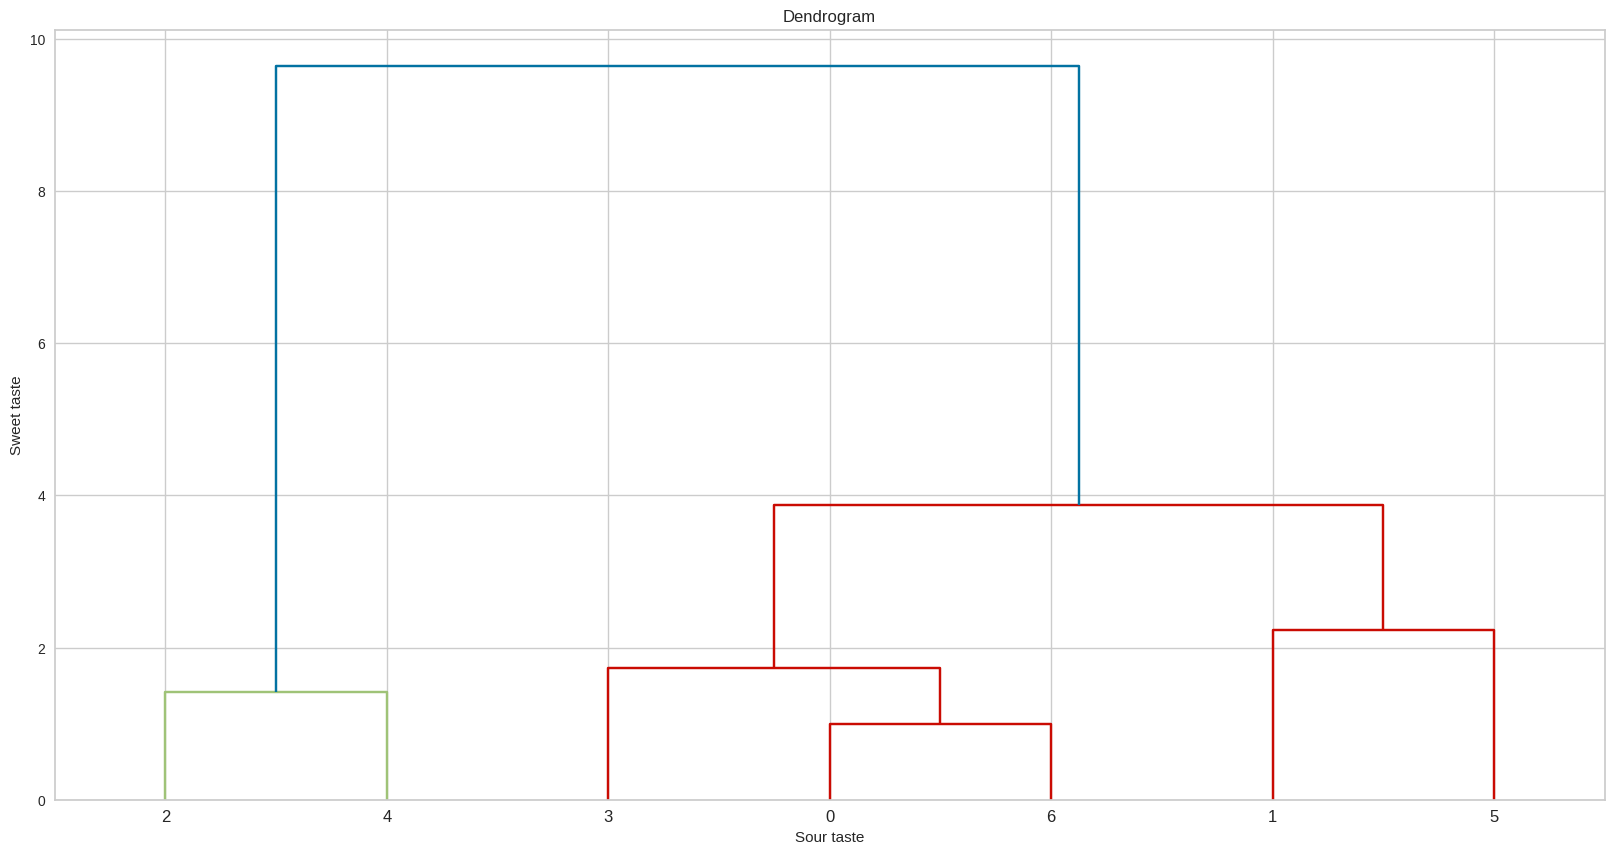

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage   # 계층적 군집화 함수 불러오기
from matplotlib import pyplot as plt                      # 시각화 라이브러리

# 신맛과 단맛으로 표현된 과일 데이터 (2차원 좌표)
fruit = np.array([[3, 4], [1, 5], [7, 9],
                  [5, 4], [6, 8], [2, 3], [4, 4]])

plt.figure(figsize=(20, 10))                              # 그래프 크기 설정 (가로 20, 세로 10)

# linkage() 함수로 클러스터 간의 거리 계산
cluster = linkage(fruit, method='ward') # 거리 측정 방법: 와드연결법

# 덴드로그램 그리기
dendrogram = dendrogram(cluster)

plt.title('Dendrogram') # 그래프 제목
plt.xlabel('Sour taste') # x축 레이블
plt.ylabel('Sweet taste') # y축 레이블


- 덴드로그램(Dendrogram)을 통해 계층 군집의 클러스터 수를 알아낸 후, 그 다음 단계는 알아낸 클러스터의 개수로 그룹화하는 것

In [ ]:
from sklearn.cluster import AgglomerativeClustering  # 계층적 군집화 클래스
import numpy as np                                   # 배열 생성을 위한 라이브러리

# 신맛과 단맛에 대한 과일 2차원 데이터
fruit = np.array([[3, 4], [1, 5], [7, 9],
                  [5, 4], [6, 8], [2, 3], [4, 4]])

# AgglomerativeClustering 객체 생성
# 클러스터 수: 2개, 거리 기준: 유클리디언, 결합 방식: ward (분산 최소화)
cluster = AgglomerativeClustering(n_clusters=2,
                                  metric='euclidean', # 거리 계산은 유클리디안 방식으로
                                  linkage='ward')

# 학습과 동시에 클러스터 예측 (0 또는 1 라벨이 붙음)
cluster.fit_predict(fruit)

array([0, 0, 1, 0, 1, 0, 0])

### 10.2 클러스터링을 활용한 쇼핑몰 회원 관리

- 쇼핑몰을 이용하는 고객을 세분화하여 체계적으로 관리하고자 한다.
- 이를 위해 회원정보를 통해 고객 ID, 나이, 성별, 연간 수입, 지출 점수와 같은 고객에 대한 몇 가지 기본 데이터를 활용한다.
- 지출 점수는 고객 행동 및 구매 데이터를 가지고 계산한 것이다.
- 지금부터 앞에서 살펴본 클러스터링 알고리즘을 적용하여 쇼핑몰 회원을 세분화하여 분석해보자.

#### (1) 데이터 읽기

In [1]:
from google.colab import drive
drive.mount('/content/Drive/')

Mounted at /content/Drive/


#### (2) 데이터 가져오기

In [2]:
#  파일 읽어오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

df = pd.read_csv('/content/Drive/MyDrive/data/Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


#### (3) 데이터 정보 확인하기

In [3]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


- 1) 나이 분포 확인

<ipython-input-18-73c6b59fc829>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'], bins=20)      # bins=20: 구간(막대 수) 20개로 나눔


Text(0.5, 1.0, 'Distplot of Age')

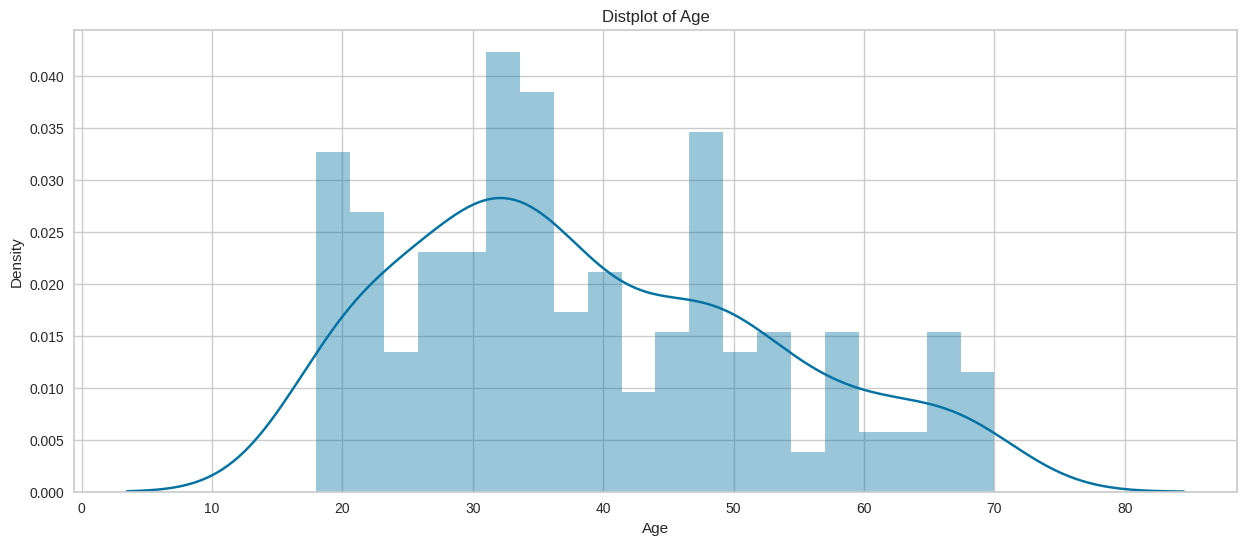

In [ ]:
import matplotlib.pyplot as plt        # 기본 시각화 도구
import seaborn as sns                 # 통계적 시각화 도구

plt.figure(1, figsize=(15, 6))        # 그래프 크기 설정 (가로 15, 세로 6)

# 나이 분포 시각화 (히스토그램 + KDE)
sns.distplot(df['Age'], bins=20)      # bins=20: 구간(막대 수) 20개로 나눔

plt.title('Distplot of Age')         # 그래프 제목


- 2) 연간 소득 히스토그램

<ipython-input-6-b61458132170>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Annual Income (k$)'], bins=20)  # 연간 소득 분포 (20구간)


Text(0.5, 1.0, 'Distplot of Income')

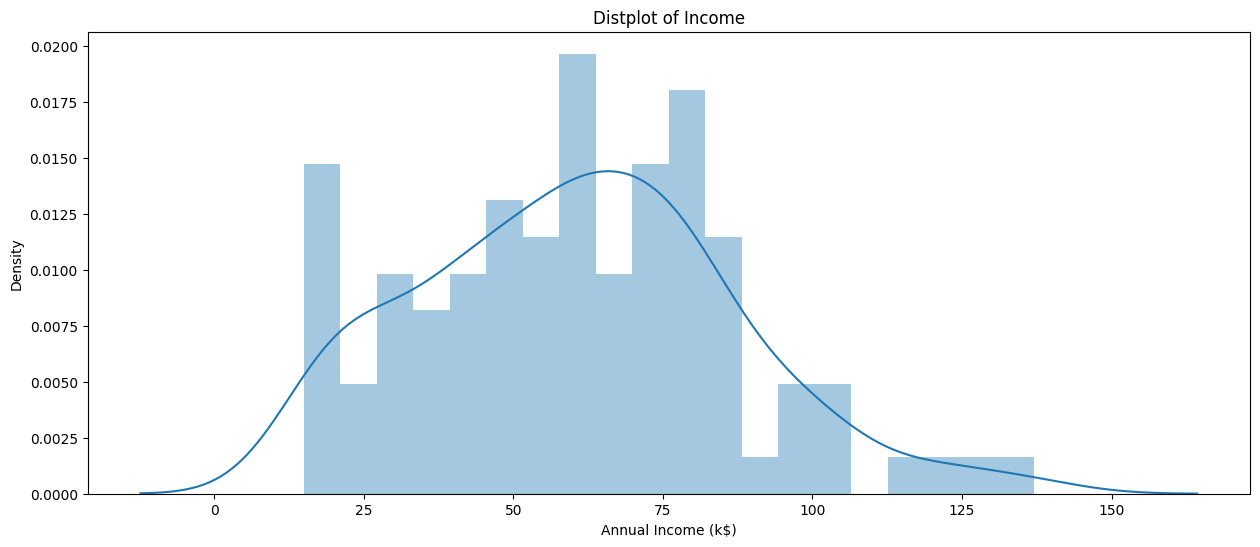

In [6]:
import matplotlib.pyplot as plt         # 시각화 라이브러리
import seaborn as sns                  # 통계 시각화 라이브러리

plt.figure(1, figsize=(15, 6))         # 그래프 크기 설정
sns.distplot(df['Annual Income (k$)'], bins=20)  # 연간 소득 분포 (20구간)
plt.title('Distplot of Income')           # 👉 제목 오타: 'Income'으로 수정 필요


- 쇼핑몰 점수 분포 시각화

<ipython-input-20-a684cbcc9352>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Spending Score (1-100)'], bins=20)


Text(0.5, 1.0, 'Distplot of Spending Score')

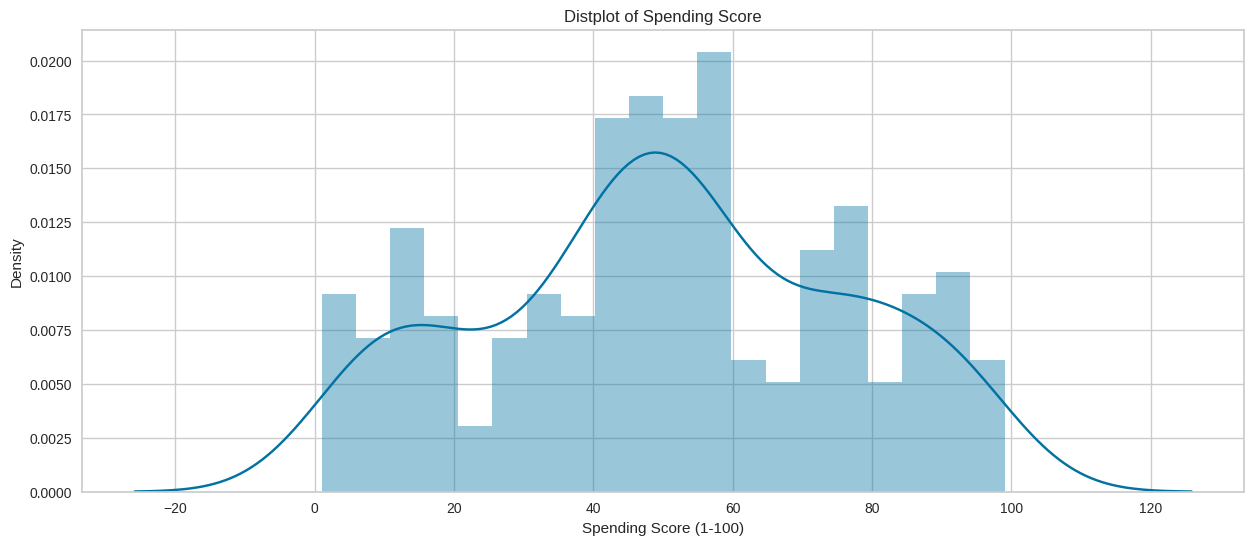

In [ ]:
# import matplotlib.pyplot as plt
# import seaborn as sns

plt.figure(1, figsize=(15, 6))
sns.distplot(df['Spending Score (1-100)'], bins=20)
plt.title('Distplot of Spending Score')


열 이름이 **Gender여야하는데** **Genre**이다.  
즉, 열 이름을 변경해야됨

In [ ]:
print(df.columns)

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')


In [7]:
df.rename(columns={'Genre': 'Gender'}, inplace=True)


In [8]:
print(df.columns)

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')


제대로 변경된 모습!

- 성별에 따른 데이터 분포 시각화

Gender
Female    112
Male       88
Name: count, dtype: int64


<ipython-input-11-712cfcc74452>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y = 'Gender', data = df,


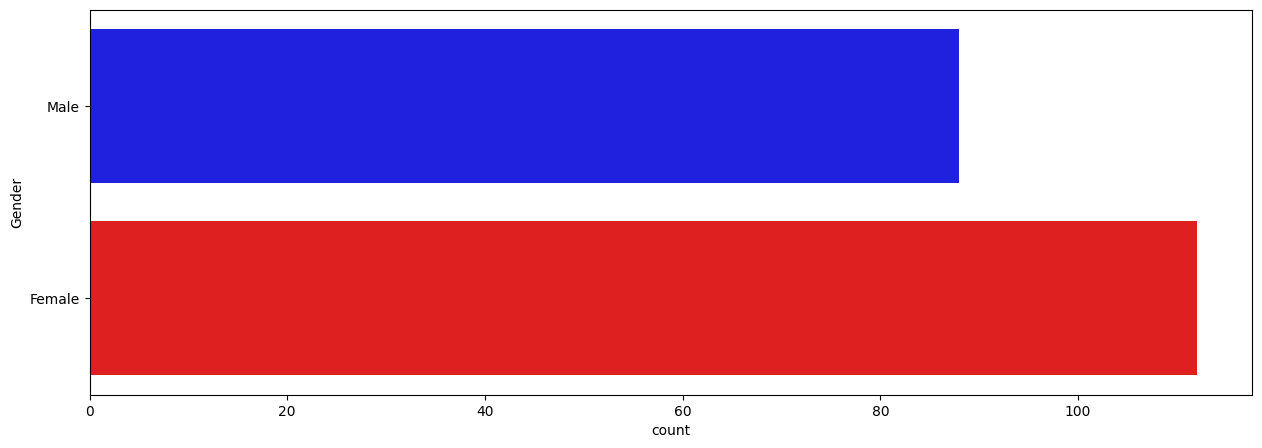

In [11]:
plt.figure(1, figsize = (15, 5))
sns.countplot(y = 'Gender', data = df,
              palette={'Female': 'red', 'Male': 'blue'})
print(df['Gender'].value_counts())

- 성별에 따른 연소득 분포
- 성별에 따른 나이와 연소득 차이가 거의 없는 것처럼 보임(명확하지 않음)

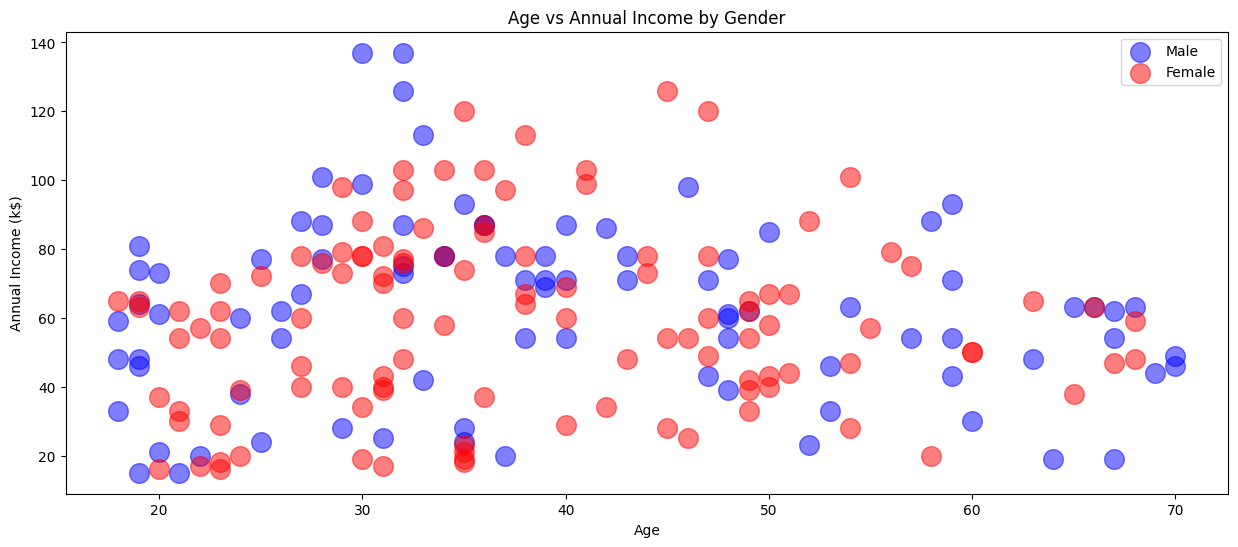

In [14]:
# 그래프 크기 설정
plt.figure(1, figsize=(15, 6))

# 성별에 따른 색상 지정
colors = {'Male': 'blue', 'Female': 'red'}

# 성별로 데이터를 나눠서 산점도 그리기
for gender in ['Male', 'Female']:
    plt.scatter(x='Age', y='Annual Income (k$)',
                data=df[df['Gender'] == gender], # 성별에 해당하는 데이터만 따로 뽑기
                s=200, alpha=0.5, # 점 크기 및 투명도
                label=gender, # 범례 표시
                color=colors[gender])  # 색상 지정

plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.title('Age vs Annual Income by Gender')
plt.legend() # 범례 표시
plt.show()


- 성별에 따른 나이 분포
- 나이의 분포는 여성이 30대에 가장 두껍게 분포되었고, 남성은 20대 초반에서 30대까지 얇게 분포

<ipython-input-16-fdf0a56f352a>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Age', y='Gender', data=df, palette=palette)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50640 (\N{HANGUL SYLLABLE E}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46384 (\N{HANGUL SYLLABLE DD

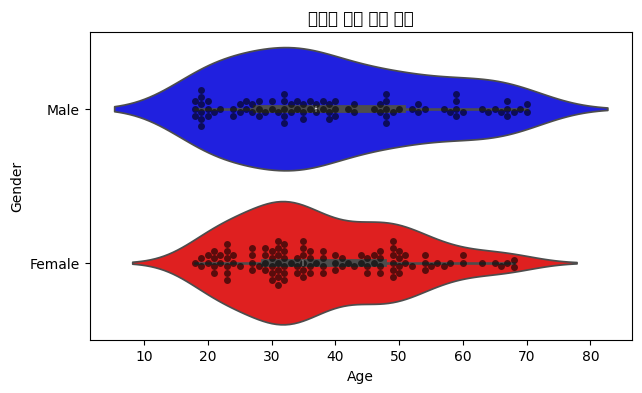

In [16]:
plt.figure(1, figsize=(7, 4))

# 성별에 따른 색상 지정
palette = {'Female': 'red', 'Male': 'blue'}

# 바이올린 플롯: 밀도 표현
sns.violinplot(x='Age', y='Gender', data=df, palette=palette)

# 스웜 플롯: 실제 점 분포 표현
sns.swarmplot(x='Age', y='Gender', data=df, color='k', alpha=0.6)

plt.ylabel('Gender')
plt.title('성별에 따른 나이 분포')
plt.show()


- 성별에 따른 연소득 분포
- 여성의 경우 대부분 40,000달러 ~ 70,000달러까지 분포
- 남성은 대부분 50,000달러 ~ 80,000달러까지 분포

<ipython-input-17-9faac99aa4f2>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Annual Income (k$)', y='Gender', data=df, palette=palette)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50640 (\N{HANGUL SYLLABLE E}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46384 (\N{HA

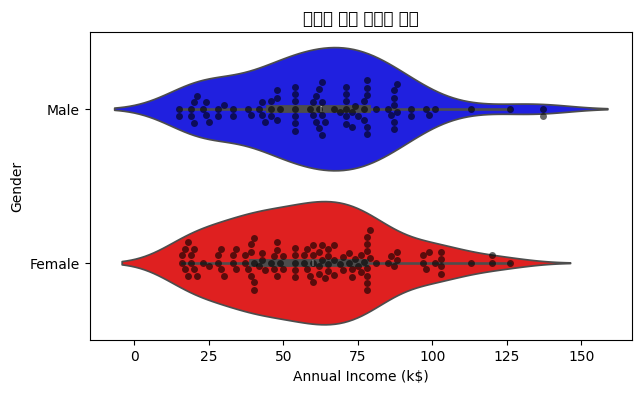

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(1, figsize=(7, 4))

# 성별에 따른 색상 설정: Female → 빨강, Male → 파랑
palette = {'Female': 'red', 'Male': 'blue'}

# 연소득 분포를 성별에 따라 바이올린 플롯으로 시각화
sns.violinplot(x='Annual Income (k$)', y='Gender', data=df, palette=palette)

# 점(개별 고객)을 겹쳐서 보여주는 swarmplot
sns.swarmplot(x='Annual Income (k$)', y='Gender', data=df, color='k', alpha=0.6)

plt.ylabel('Gender')
plt.title('성별에 따른 연소득 분포')
plt.show()


- 성별에 따른 쇼핑몰 점수 분포
- 성별에 크게 차이 없이 40점에서 60점 사이가 가장 많이 분포되었음
- 또한, 80점 이상을 가진 회원도 꽤 있다는 것도 알 수 있다.

<ipython-input-18-a99b508b0cb4>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Spending Score (1-100)', y='Gender', data=df, palette=palette)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50640 (\N{HANGUL SYLLABLE E}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46384 (\

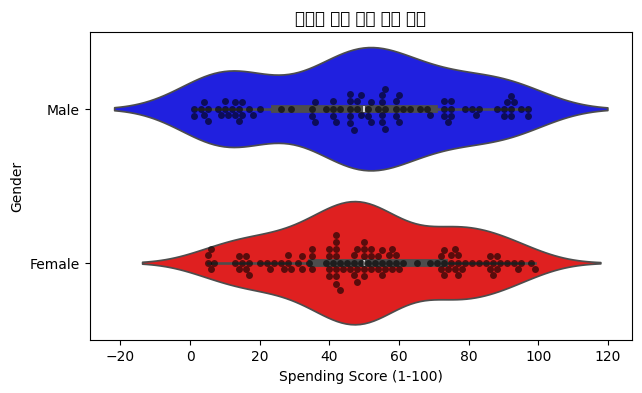

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(1, figsize=(7, 4))

# 성별에 따른 색상 지정
palette = {'Female': 'red', 'Male': 'blue'}

# 바이올린 플롯으로 밀도 시각화
sns.violinplot(x='Spending Score (1-100)', y='Gender', data=df, palette=palette)

# 스웜 플롯으로 개별 데이터 점 시각화
sns.swarmplot(x='Spending Score (1-100)', y='Gender', data=df, color='k', alpha=0.6)

plt.ylabel('Gender')
plt.title('성별에 따른 쇼핑 점수 분포')
plt.show()


- K-means를 이용한 군집화 진행
- ① 고객 세분화를 위한 최적의 k 찾기

**나이(Age)와 쇼핑몰 점수(Spending Score (1-100))로 최적의 k 찾기**
- KMeans알고리즘에서 최적의 k를 찾는 방법은 두 가지가 있음. 하나는 Elbow방법 또 하나는 KElbowVisualizer 이렇게 있다. 아래는 두 번째 방법(KElbowVisualizer)을 사용했다.

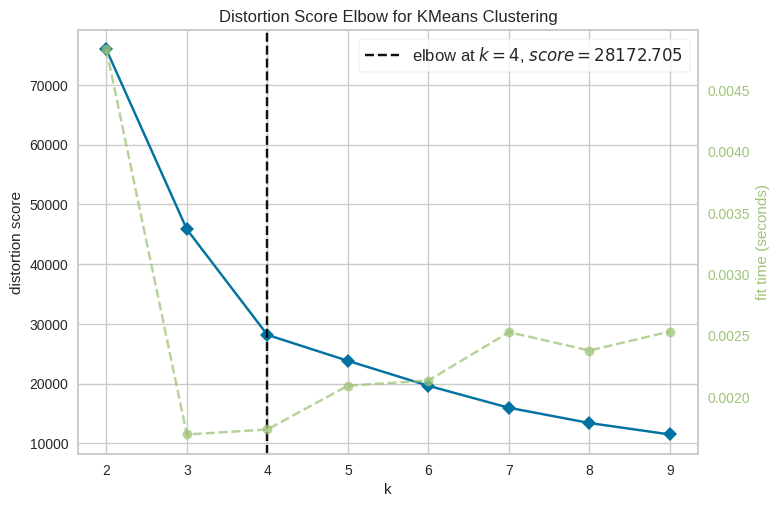

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

data = df[['Age', 'Spending Score (1-100)']].iloc[:, :].values  # 클러스터링 모델과 시각화

model = KMeans() # KMeans 모델 객체 생성(n_clusters는 나중에 자동으로 여러 개 테스트됨)
visualizer = KElbowVisualizer(model, k=(2, 10)) # KElbowVisualizer 객체 생성: k값을 2부터 10까지 테스트
visualizer.fit(data) # 여러 k값으로 KMeans 학습 -> 응집도 계산
visualizer.show() # Elbow 그래프 시각화

**연간 소득(Annual Income (k$))과 쇼핑몰 점수(Spending Score (1-100))로 최적의 k 찾기**

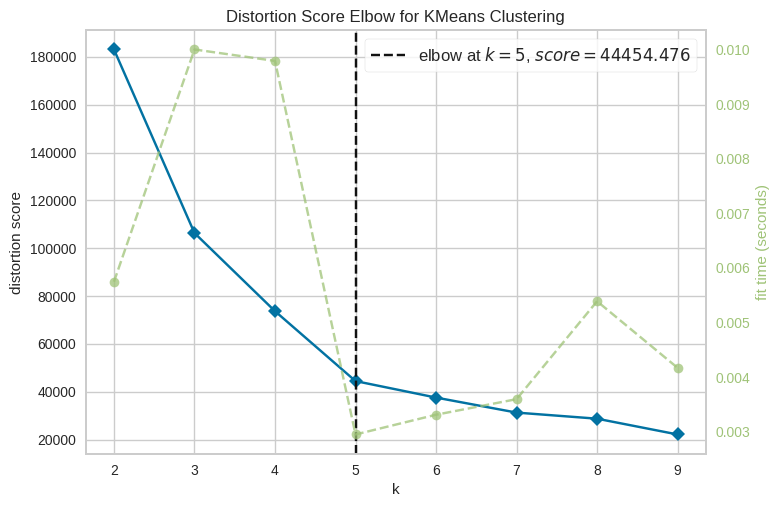

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# 클러스터링에 사용할 데이터 추출
data = df[['Annual Income (k$)', 'Spending Score (1-100)']].iloc[:, :].values # 데이터 추출

model = KMeans() # KMeans 객체 생성
visualizer = KElbowVisualizer(model, k=(2, 10)) # KElbowVisualizer 객체 생성: 최적의 k 찾기
visualizer.fit(data) # 학습시키기
visualizer.show()


**나이와 연간 소득과 쇼핑몰 점수로 최적의 k 찾기**

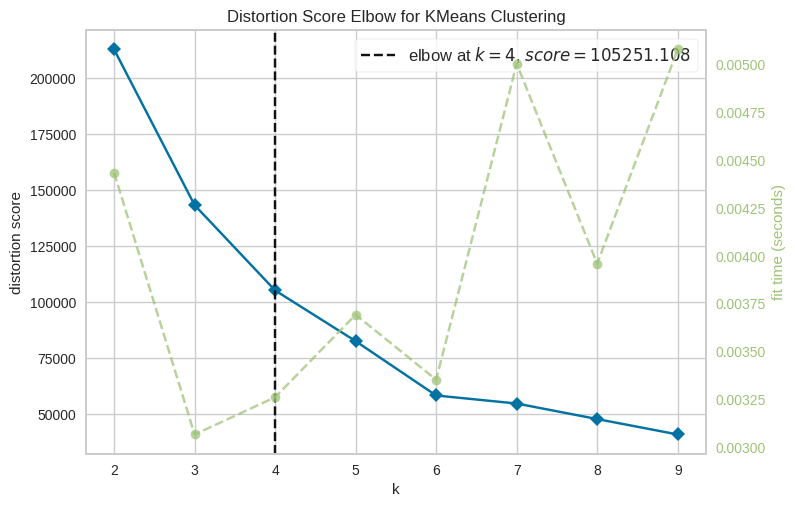

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

data = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].iloc[:, :].values  # 클러스터링 모델과 시각화

model = KMeans()
visualizer = KElbowVisualizer(model, k=(2, 10))
visualizer.fit(data)
visualizer.show()


K-means를 이용한 군집화

모델 생성과 학습
- 나이와 쇼핑몰 점수로 세분화한 고객 클러스터

In [21]:
# 클러스터링에 사용할 변수 선택
data = df[['Age', 'Spending Score (1-100)']].iloc[:, :].values

algorithm = KMeans(n_clusters=4) # KMeans 알고리즘 객체 생성
algorithm.fit(data) # 학습시키기

labels1 = algorithm.labels_ # 학습된 결과에서 각 데이터가 속한 군집 번호(label) 추출
df['label1'] = labels1 # 원본 데이터프레임에 군집 결과(label1 컬럼) 추가

df.head(20) # 상위 20개 샘플 확인

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),label1
0,1,Male,19,15,39,0
1,2,Male,21,15,81,3
2,3,Female,20,16,6,1
3,4,Female,23,16,77,3
4,5,Female,31,17,40,0
5,6,Female,22,17,76,3
6,7,Female,35,18,6,1
7,8,Female,23,18,94,3
8,9,Male,64,19,3,1
9,10,Female,30,19,72,3


각 클러스터의 특징 살펴보기

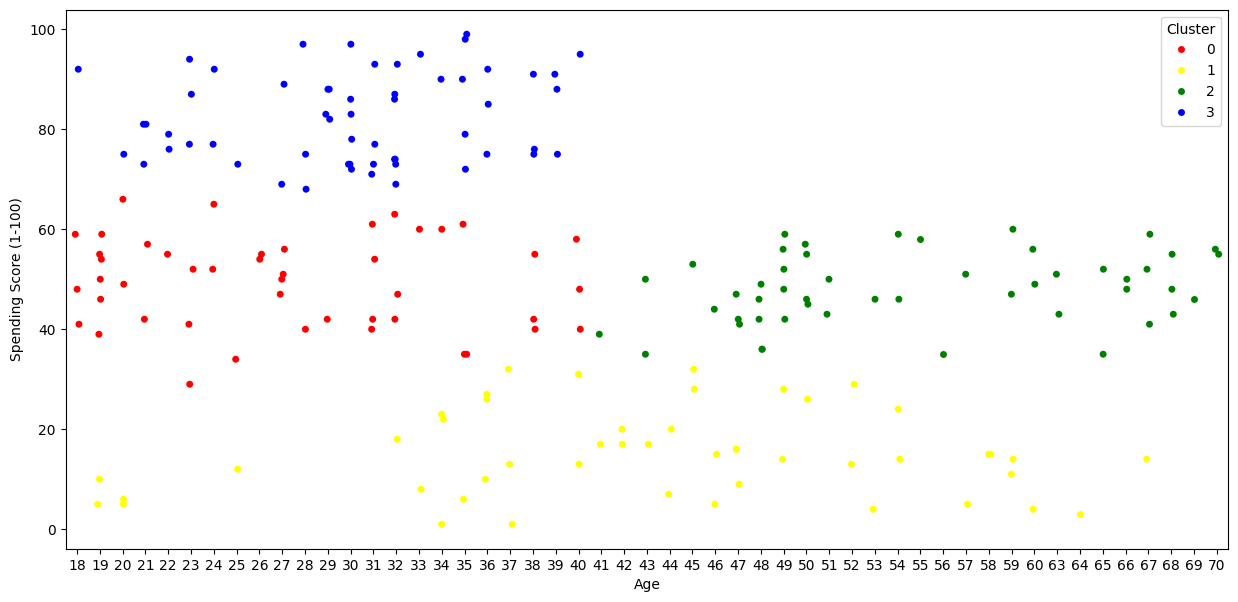

In [23]:
plt.figure(figsize=(15,7))

palette = ['red', 'yellow', 'green', 'blue'] # 색깔 지정

sns.stripplot(x='Age', y='Spending Score (1-100)', data=df,
              hue='label1', jitter=True, palette=palette) # 산점도

plt.legend(title='Cluster')
plt.show()

② 모델 생성과 학습 - 연간 소득과 쇼핑몰 점수로 세분화한 고객 클러스터

연간 소득과 쇼핑몰 점수로 모델 생성과 학습

In [ ]:
data = df[['Annual Income (k$)', 'Spending Score (1-100)']].iloc[:, :].values

algorithm = KMeans(n_clusters = 5)
algorithm.fit(data)

labels2 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

df['label2'] = labels2

df.head(20)


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),label1,label2
0,1,Male,19,15,39,3,3
1,2,Male,21,15,81,1,4
2,3,Female,20,16,6,2,3
3,4,Female,23,16,77,1,4
4,5,Female,31,17,40,3,3
5,6,Female,22,17,76,1,4
6,7,Female,35,18,6,2,3
7,8,Female,23,18,94,1,4
8,9,Male,64,19,3,2,3
9,10,Female,30,19,72,1,4


각 클러스터의 특징 살펴보기 (시각화)

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

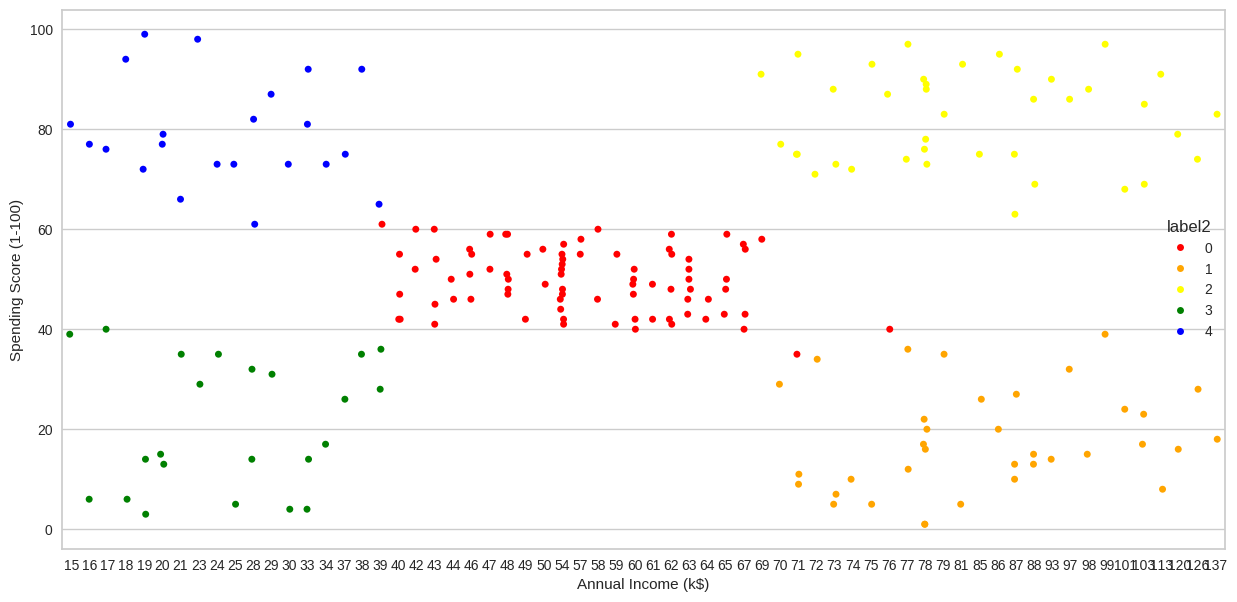

In [ ]:
plt.figure(figsize = (15, 7))
sns.stripplot(x='Annual Income (k$)', y='Spending Score (1-100)',
              data=df, hue='label2', jitter=True,
              palette=['red', 'orange', 'yellow', 'green', 'blue'])


② 모델 생성과 학습
- 나이와 연간 소득과 쇼핑몰 점수로 세분화한 고객 클러스터

In [ ]:
data = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].iloc[:, :].values

algorithm = KMeans(n_clusters = 5)
algorithm.fit(data)

label3 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

df['label3'] = label3

df.head(10)


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),label1,label2,label3
0,1,Male,19,15,39,3,3,4
1,2,Male,21,15,81,1,4,3
2,3,Female,20,16,6,2,3,4
3,4,Female,23,16,77,1,4,3
4,5,Female,31,17,40,3,3,4
5,6,Female,22,17,76,1,4,3
6,7,Female,35,18,6,2,3,4
7,8,Female,23,18,94,1,4,3
8,9,Male,64,19,3,2,3,4
9,10,Female,30,19,72,1,4,3


<Axes: xlabel='Age', ylabel='Annual Income (k$)'>

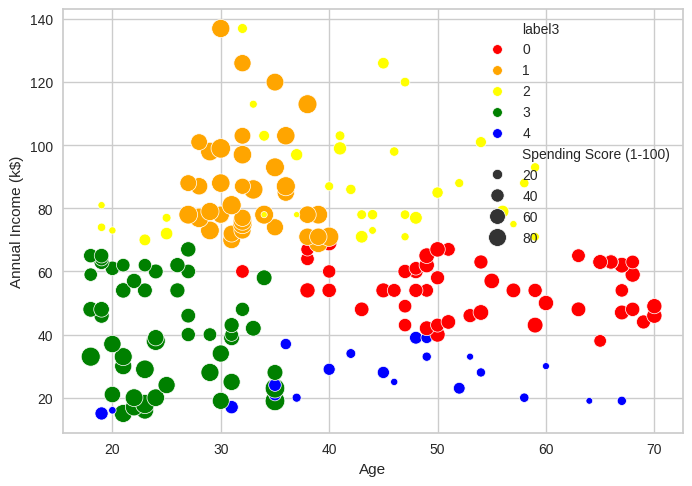

In [ ]:
sns.scatterplot(x='Age', y='Annual Income (k$)', hue='label3',
                size='Spending Score (1-100)',
                data=df,  palette=['red', 'orange', 'yellow', 'green', 'blue'],
                sizes=(20, 200))


K-Means 모델을 이용한 예측값 확인

In [ ]:
algorithm.predict([[19, 15, 39]])  # 샘플 고객 군집 예측

data = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].iloc[:, :].values

df['label3_pred'] = algorithm.predict(data)
df[['label3', 'label3_pred']].head(10)


,label3,label3_pred
0,4,4
1,3,3
2,4,4
3,3,3
4,4,4
5,3,3
6,4,4
7,3,3
8,4,4
9,3,3


 계층적 군집화를 위한 라이브러리 불러오기

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt


 거리 측정 방법에 따른 Hierarchical clustering
- 가장 먼저 회원 정보 데이터를 읽어와 필요한 속성 값을 추출함

In [ ]:
data = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].iloc[:, :].values
data.shape

(200, 3)

4) Hierarchical clustering을 이용한 군집화

- method='single'

(199, 4)


Text(0, 0.5, 'Euclidean distances')

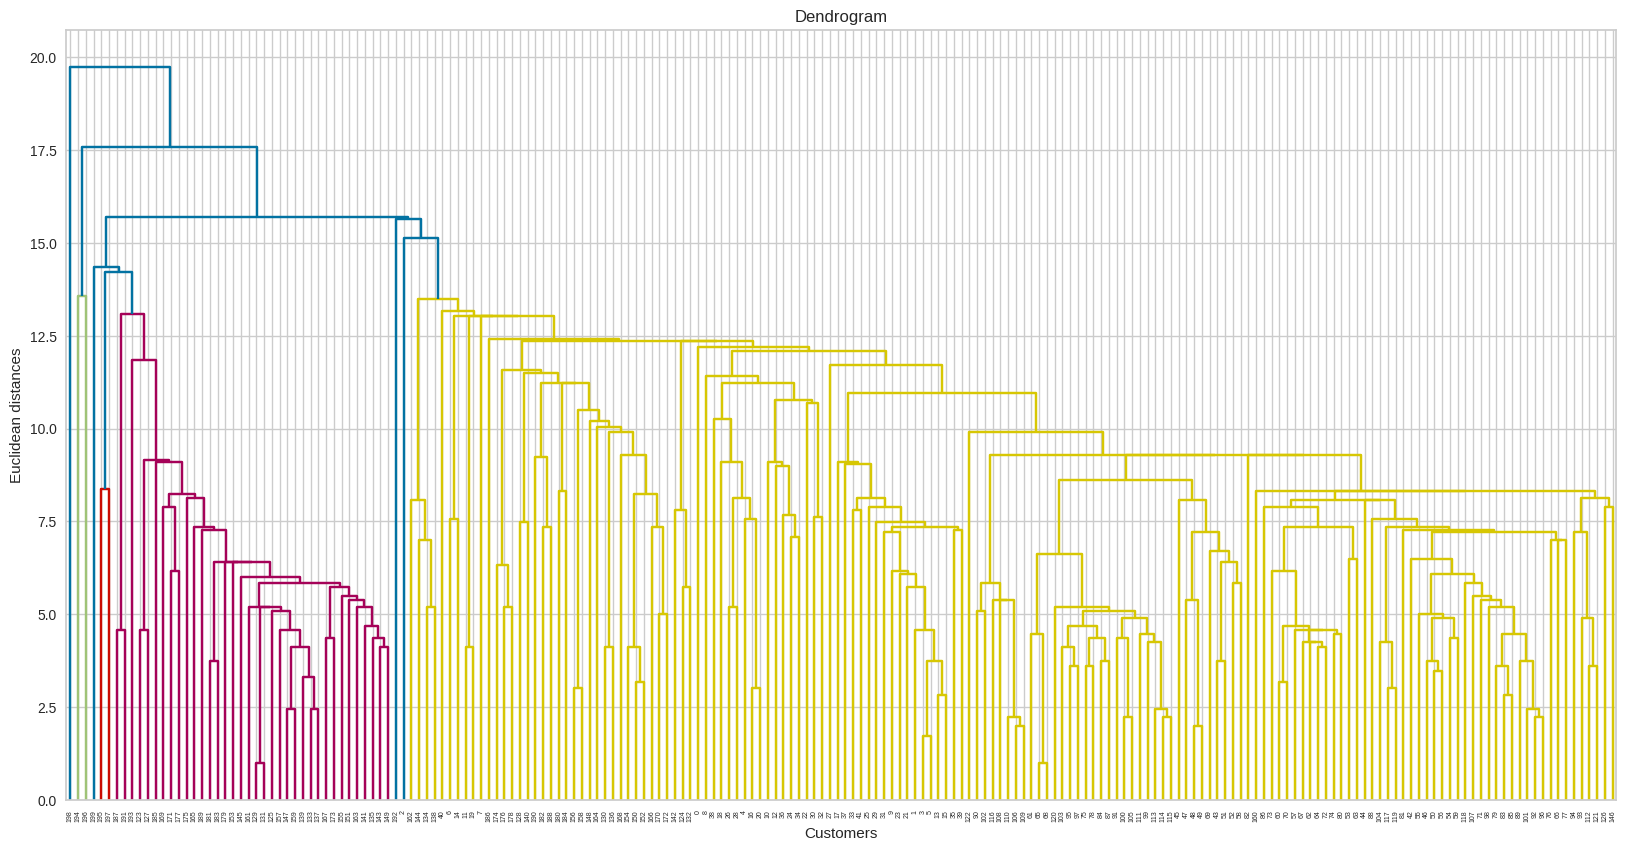

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

plt.figure(figsize=(20, 10))
cluster = linkage(data, method='single')
print(cluster.shape)
dendrogram = dendrogram(cluster)
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')


-  method='complete'

(199, 4)


Text(0, 0.5, 'Euclidean distances')

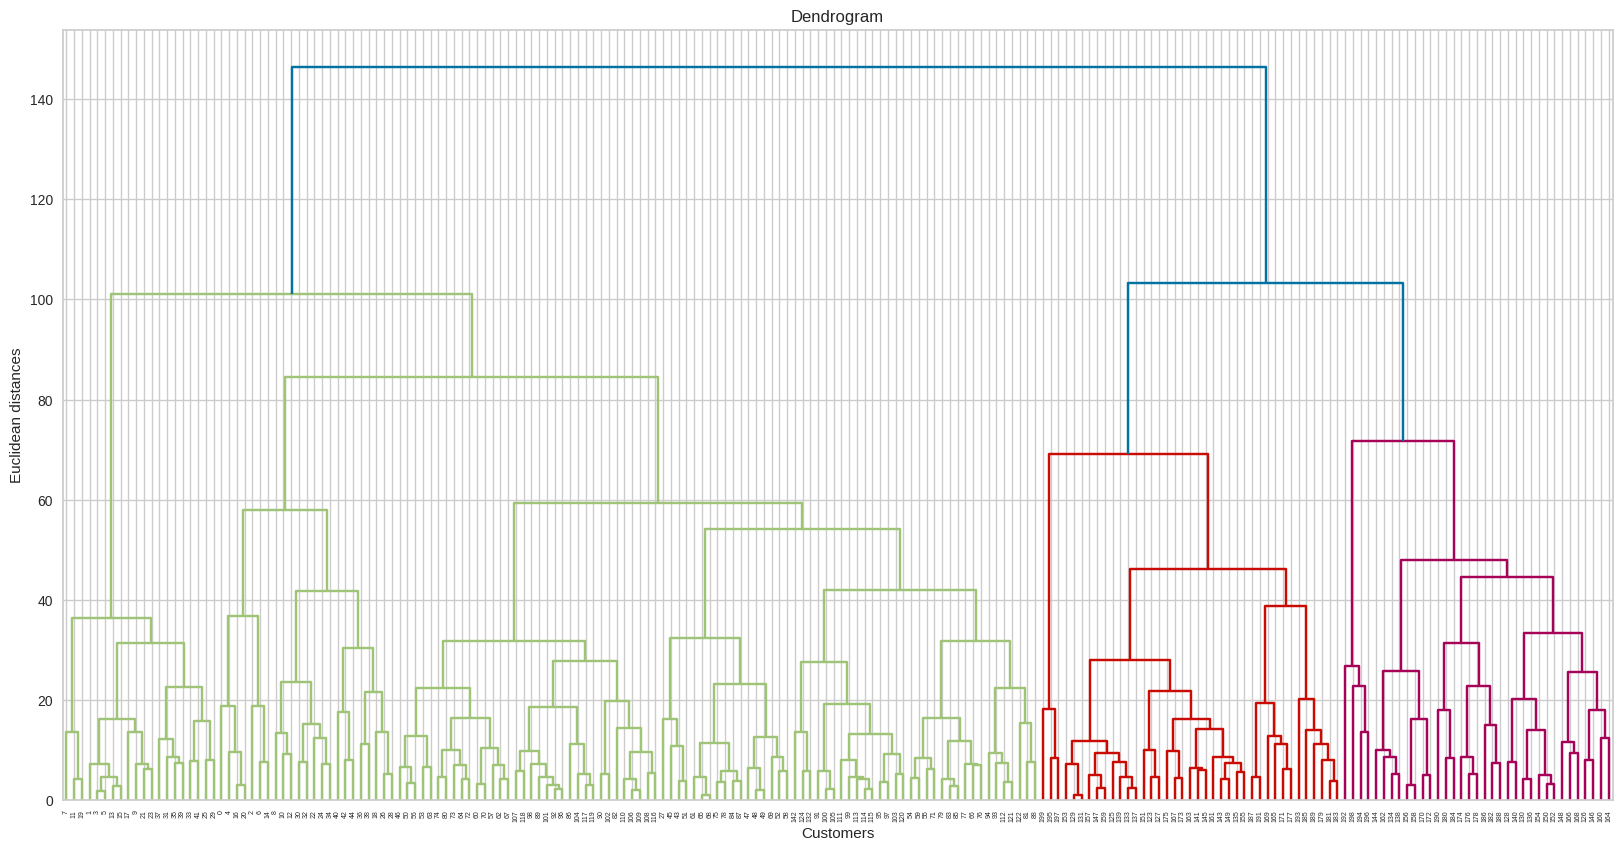

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

plt.figure(figsize=(20, 10))
cluster = linkage(data, method='complete')
print(cluster.shape)
dendrogram = dendrogram(cluster)
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')


- method='average'

(199, 4)


Text(0, 0.5, 'Euclidean distances')

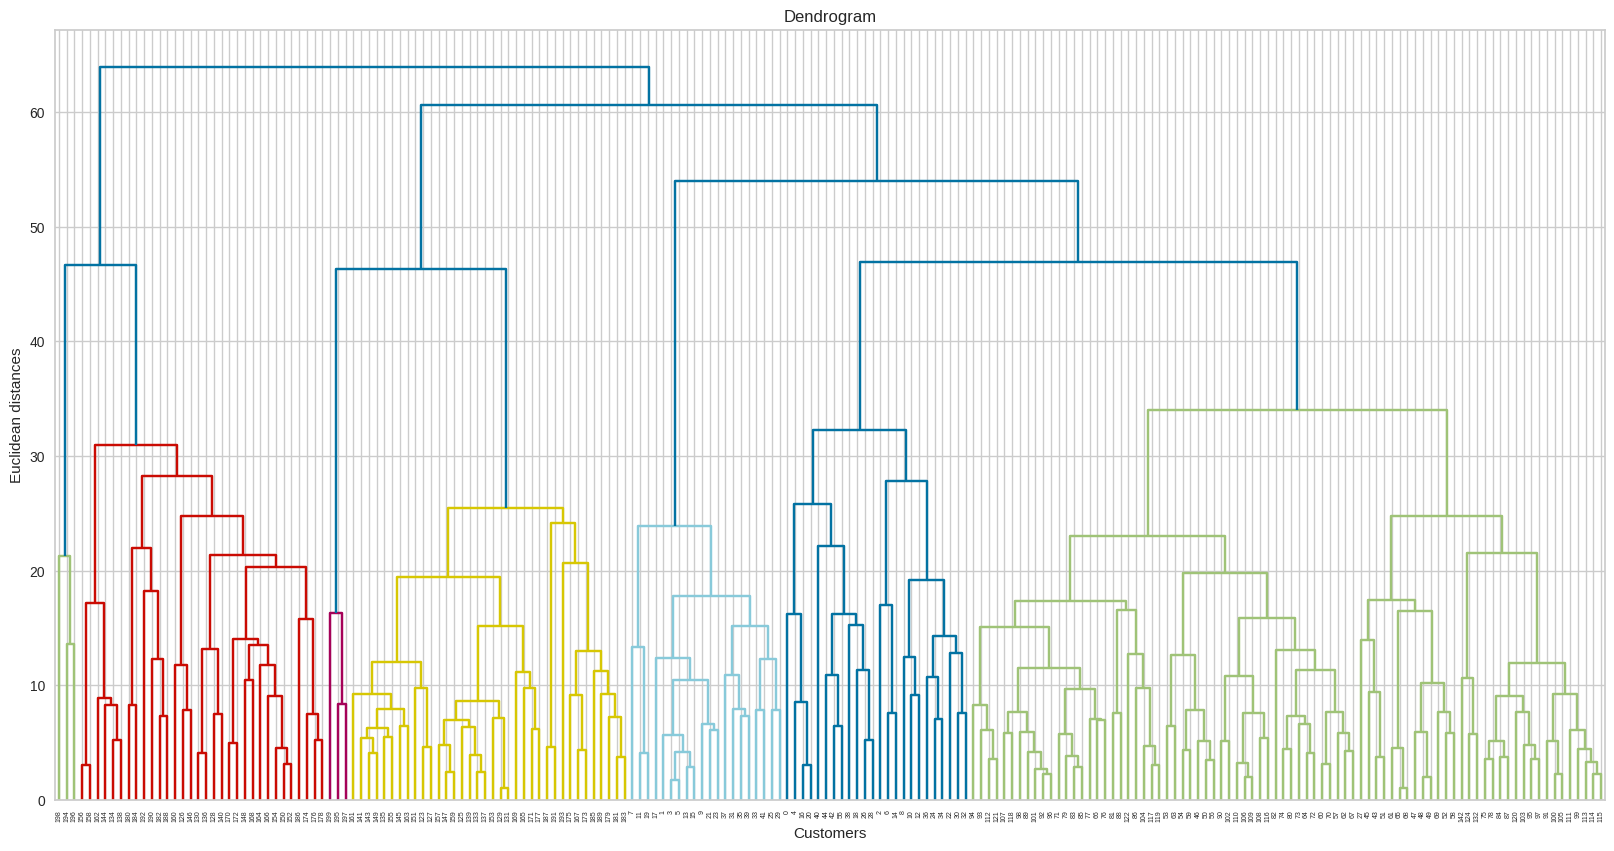

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

plt.figure(figsize=(20, 10))
cluster = linkage(data, method='average')
print(cluster.shape)
dendrogram = dendrogram(cluster)
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')


-  method='ward'

Text(0, 0.5, 'Euclidean distances')

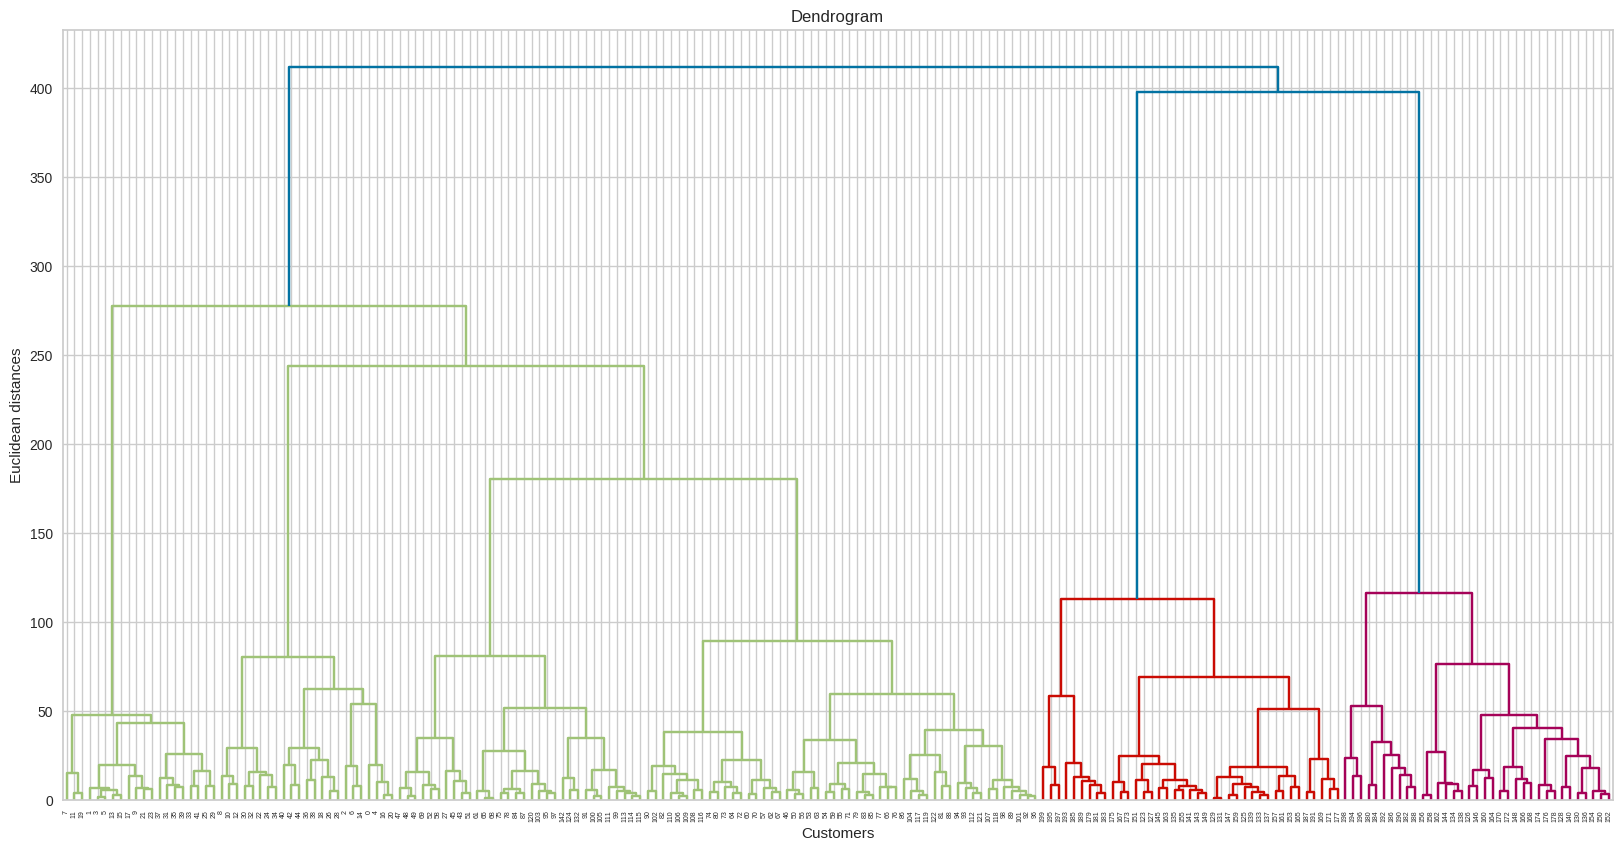

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

plt.figure(figsize=(20, 10))
dendrogram = dendrogram(linkage(data, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')


③ 모델 학습과 시각화 - 클러스터의 수는 3,4,5 중에 하나를 선택(교재는 5를 선택)

In [ ]:
from sklearn.cluster import AgglomerativeClustering

cluster_model1 = AgglomerativeClustering(n_clusters=5,
                                         metric='euclidean', linkage='ward')
cluster_label = cluster_model1.fit_predict(data)

df['label4'] = cluster_label
df.head()


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),label1,label2,label3,label3_pred,label4
0,1,Male,19,15,39,3,3,4,4,4
1,2,Male,21,15,81,1,4,3,3,3
2,3,Female,20,16,6,2,3,4,4,4
3,4,Female,23,16,77,1,4,3,3,3
4,5,Female,31,17,40,3,3,4,4,4


<ipython-input-47-eea377ee4b7a>:5: UserWarning: The palette list has more values (7) than needed (5), which may not be intended.
  sns.scatterplot(


<Axes: xlabel='Age', ylabel='Annual Income (k$)'>

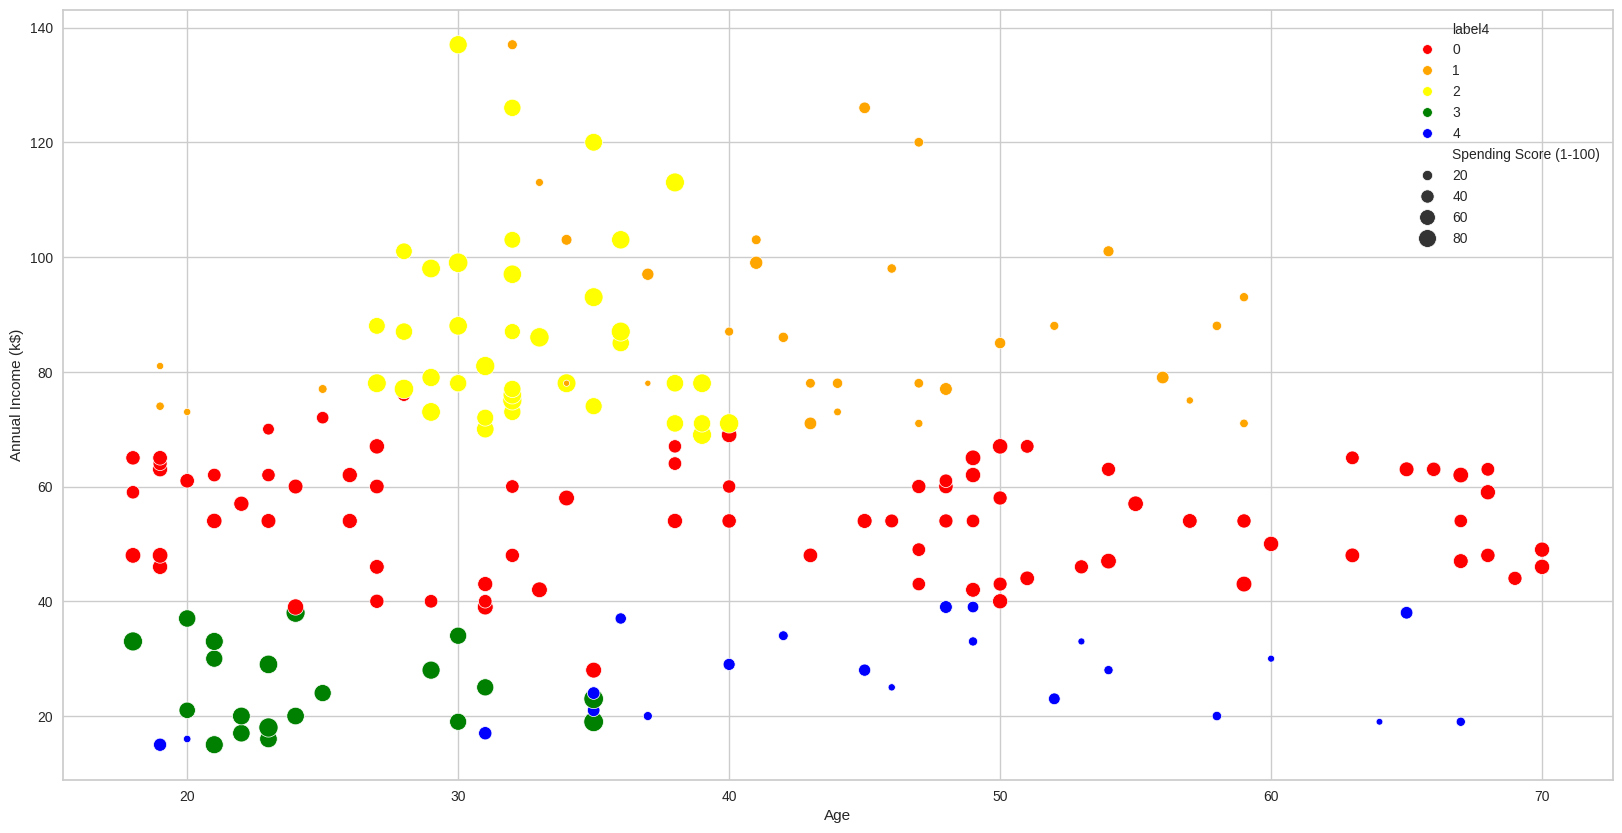

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt

plt.figure(figsize=(20, 10))
sns.scatterplot(
    x='Age',  y='Annual Income (k$)', hue='label4',
    size='Spending Score (1-100)',
    data=df,
    palette=['red', 'orange', 'yellow', 'green', 'blue', 'navy', 'purple'],
    sizes=(20, 200)
)
